ME 2016 - Nonlinear Dynamical Systems 1

Homework 3

**Dane Sabo**

In [1]:
import sympy as sm
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import *

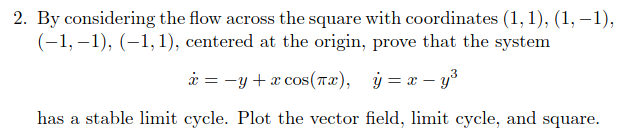

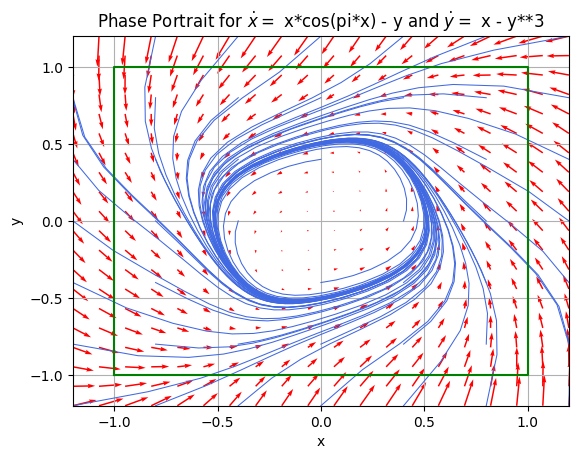

In [2]:
x, y = sm.symbols('x,y')
xdot = -y + x*sm.cos(sm.pi*x)
ydot = x - y**3

#Create Functions
P = lambda x, y: -y + x*np.cos(np.pi*x)
Q = lambda x, y: x - y**3
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 5, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)
rect = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]])
plt.plot(rect[:,0], rect[:,1], '-g')


In [3]:
#Guess a psi for Poincare - Bendixson Theorem
psi = 1
def sign_change_test(xdot, ydot, psi):
    div_psiX = sm.diff(psi*xdot,x) + sm.diff(psi*ydot, y)
    print(f'dV/dt Expression: \n{div_psiX}')
    print(f'\ndV/dt Simplified:\n{sm.simplify(div_psiX)}\n')
    
    sign_changes = sm.solve(sm.Eq(0,div_psiX),x,y)
    print(f'Sign Changes: \n{sign_changes}')
    return div_psiX

expr = sign_change_test(xdot, ydot, psi)

dV/dt Expression: 
-pi*x*sin(pi*x) - 3*y**2 + cos(pi*x)

dV/dt Simplified:
-pi*x*sin(pi*x) - 3*y**2 + cos(pi*x)

Sign Changes: 
[(x, -sqrt(-3*pi*x*sin(pi*x) + 3*cos(pi*x))/3), (x, sqrt(-3*pi*x*sin(pi*x) + 3*cos(pi*x))/3)]


In [4]:
expr.subs(x,-1)
#This is clearly always < 0. No sign change

-3*y**2 - 1

In [5]:
expr.subs(y,-1)

-pi*x*sin(pi*x) + cos(pi*x) - 3

In [6]:
expr.subs(x,1)

-3*y**2 - 1

In [7]:
expr.subs(y,1)

-pi*x*sin(pi*x) + cos(pi*x) - 3

Text(0, 0.5, 'y')

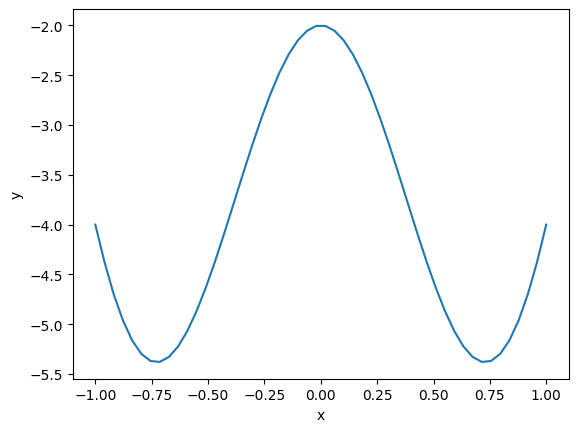

In [8]:
#Let's check graphically the range of -pi*x*sin(pi*x) + cos(pi*x) - 3
x_range = np.linspace(-1,1,50)
y_range = -np.pi*x_range*np.sin(np.pi*x_range) + np.cos(np.pi*x_range) - 3
plt.figure()
plt.plot(x_range,y_range)
plt.xlabel('x')
plt.ylabel('y')

#Looks like no sign change for our domain of -1<x<1

In [9]:
expr.subs(x,-0.1)

-3*y**2 - 0.1*pi*sin(0.1*pi) + cos(0.1*pi)

In [10]:
expr.subs(x,0.1)

-3*y**2 - 0.1*pi*sin(0.1*pi) + cos(0.1*pi)

In [11]:
expr.subs(y,-0.1)

-pi*x*sin(pi*x) + cos(pi*x) - 0.03

In [12]:
expr.subs(y,0.1)

-pi*x*sin(pi*x) + cos(pi*x) - 0.03

Text(0, 0.5, 'Range (y or x)')

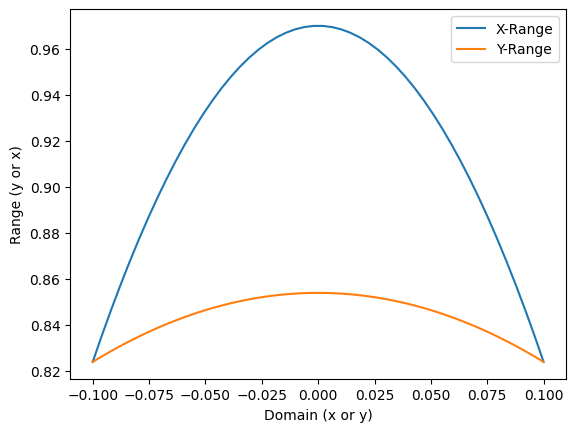

In [13]:
#Let's check graphically the range of -pi*x*sin(pi*x) + cos(pi*x) - 3
the_range = np.linspace(-0.1,0.1,50)
y_range = -3*the_range**2 - 0.1*np.pi*np.sin(0.1*np.pi)+np.cos(0.1*np.pi)
x_range = -np.pi*the_range*np.sin(np.pi*the_range)+np.cos(np.pi*the_range)-0.03
plt.figure()
plt.plot(the_range,x_range, the_range, y_range)
plt.legend(['X-Range', 'Y-Range'])
plt.xlabel('Domain (x or y)')
plt.ylabel('Range (y or x)')

#Looks like no sign change for our domain of -1<x<1, always positive (towards limit cycle)

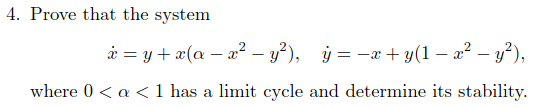

In [14]:
alpha, x, y = sm.symbols('alpha, x, y')
P = y + x*(alpha - x**2 - y**2)
Q = -x + y*(1-x**2-y**2)

Peqn = sm.Eq(P, 0)
Qeqn = sm.Eq(Q, 0)

criticalpoints = sm.solve((Peqn,Qeqn),x,y)
display(criticalpoints)

[(0, 0),
 (sqrt(2)*sqrt((alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(-alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/4,
  sqrt(alpha/(2*alpha - 2) - sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(alpha + sqrt(alpha**2 - 2*alpha - 3) - 1)/4,
  -sqrt(alpha/(2*alpha - 2) - sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(-alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/4,
  sqrt(alpha/(2*alpha - 2) + sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(alpha - sqrt(alpha**2 - 2*alpha - 3) - 1)/4,
  -sqrt(alpha/(2*alpha - 2) + sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2)))]

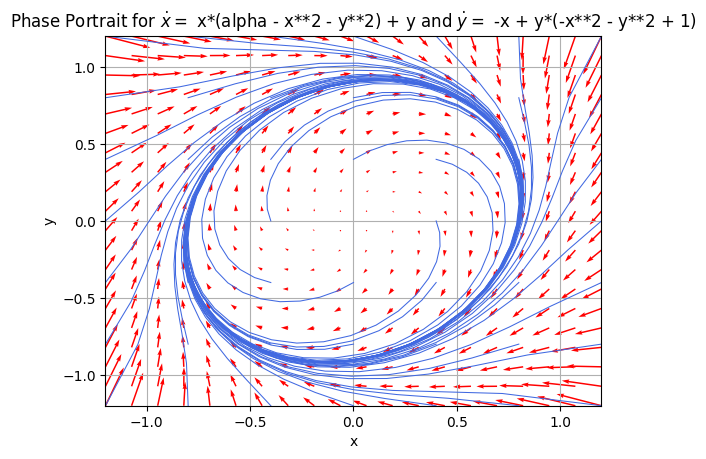

In [15]:
xdot = P
ydot = Q
alpha_val = 0.5

#Create Functions
P = lambda x, y: y + x*(alpha_val - x**2 - y**2)
Q = lambda x, y: -x + y*(1 - x**2 - y**2)
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 5, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)



From calculating the algabraeic expressions for the critical points and looking at the plot, it's pretty clear there is one critical point inside the potential limit cycle and the rest are outside of the potential limit cycle. 

It also looks like this limit cycle is **stable**. That is because the vectors point in towards the limit cycle. Let me prove this:

In [16]:
#Guess a psi for Poincare - Bendixson Theorem
psi = 1
def sign_change_test(xdot, ydot, psi):
    div_psiX = sm.diff(psi*xdot,x) + sm.diff(psi*ydot, y)
    print(f'dV/dt Expression: \n{div_psiX}')
    print(f'\ndV/dt Simplified:\n{sm.simplify(div_psiX)}\n')
    
    sign_changes = sm.solve(sm.Eq(0,div_psiX),x,y)
    print(f'Sign Changes: \n{sign_changes}')
    return div_psiX

expr = sign_change_test(xdot, ydot, psi)

dV/dt Expression: 
alpha - 4*x**2 - 4*y**2 + 1

dV/dt Simplified:
alpha - 4*x**2 - 4*y**2 + 1

Sign Changes: 
[(-sqrt(alpha - 4*y**2 + 1)/2, y), (sqrt(alpha - 4*y**2 + 1)/2, y)]


Now let me draw a rectangle around this limit cycle the same as the last problem. A rectangle at points (-1, -1), (-1, 1), (1, -1), (1, 1), and a smaller internal rectangle at (-0.1, -0.1), (-0.1, 0.1), (0.1, 0.1), (0.1, -0.1). 

In [17]:
expr.subs(x,-1)
#This is clearly always < 0. No sign change

alpha - 4*y**2 - 3

In [18]:
expr.subs(y,-1)

alpha - 4*x**2 - 3

In [19]:
expr.subs(x,1)

alpha - 4*y**2 - 3

In [20]:
expr.subs(y,1)

alpha - 4*x**2 - 3

For $0 < \alpha < 1$ these are all clearly always negative.

In [22]:
expr.subs(x,-0.1)

alpha - 4*y**2 + 0.96

In [23]:
expr.subs(x,0.1)

alpha - 4*y**2 + 0.96

In [24]:
expr.subs(y,-0.1)

alpha - 4*x**2 + 0.96

In [25]:
expr.subs(y,0.1)

alpha - 4*x**2 + 0.96

For x or y = 0.1, it's clear this is always positive for $ 0 < \alpha < 1 $.
As a result, there must be a limit cycle between these two rectangles that is stable, as flow enters the region on all boundaries.

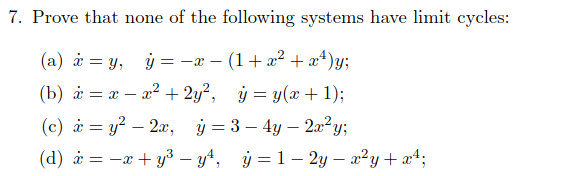

**Problem A**

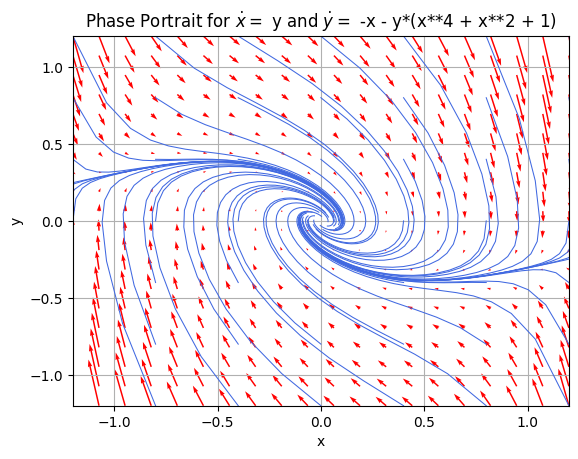

In [28]:
xdot = y
ydot = -x - (1+x**2+x**4)*y

#Create Functions
P = lambda x, y: y
Q = lambda x, y: -x - (1+x**2+x**4)*y
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 5, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)

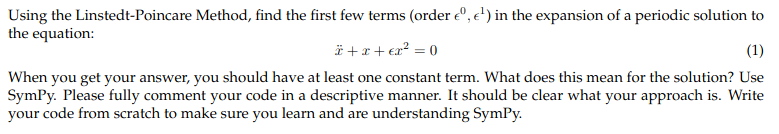

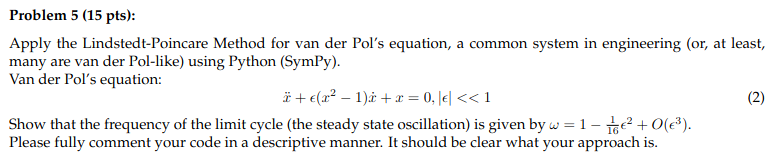